<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 6</b></center>
<center><b><h1>03/01/2025</b></center>
<pre>    

# import necessary libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle


# Import diabetes.csv data ser using sklearn

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [20]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,Diabetic
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,Non Diabetic
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,Diabetic
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,Non Diabetic
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,Diabetic
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,Non Diabetic
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27,Non Diabetic
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,Non Diabetic
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47,Diabetic


# Check the distribution of the target

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


# Replace zeros with NaN for specific columns

In [8]:
data.replace(0, np.nan, inplace=True)

# Check for missing values

In [9]:
data.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Fill missing values with median

In [14]:
data['Pregnancies'] = data['Pregnancies'].fillna(data['Pregnancies'].median())
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())

# Visualize Distributions

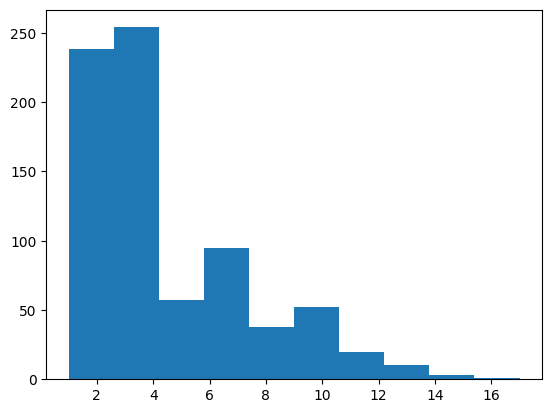

In [17]:
plt.hist(data['Pregnancies'])
plt.show()

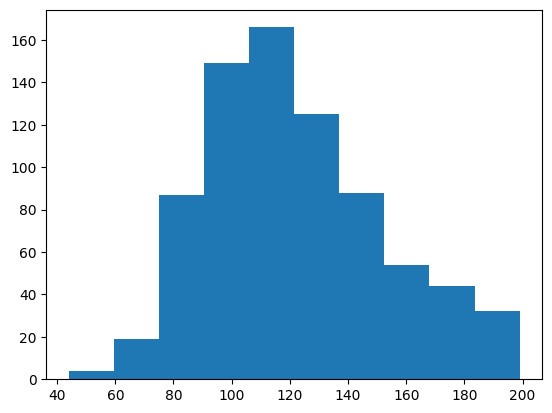

In [18]:
plt.hist(data['Glucose'])
plt.show()

# Convert Targer data into interger code

In [22]:
data['Outcome']=data['Outcome'].replace('Diabetic',1)
data['Outcome']=data['Outcome'].replace('Non Diabetic',0)

<ipython-input-22-3d47c1c19835>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Outcome']=data['Outcome'].replace('Non Diabetic',0)


In [23]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47,1


# Divide the data into input and output

In [24]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [26]:
x,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6.0    148.0           72.0           35.0    125.0  33.6   
 1            1.0     85.0           66.0           29.0    125.0  26.6   
 2            8.0    183.0           64.0           29.0    125.0  23.3   
 3            1.0     89.0           66.0           23.0     94.0  28.1   
 4            4.0    137.0           40.0           35.0    168.0  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763         10.0    101.0           76.0           48.0    180.0  32.9   
 764          2.0    122.0           70.0           27.0    125.0  36.8   
 765          5.0    121.0           72.0           23.0    112.0  26.2   
 766          1.0    126.0           60.0           29.0    125.0  30.1   
 767          1.0     93.0           70.0           31.0    125.0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

# Splitting the dataset into the Training set and Test set

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=25)

# Create Model

In [113]:
model=DecisionTreeClassifier()

# Fitting DecisionTreeClassifier   on dataset

In [114]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

# Display Decision Tree

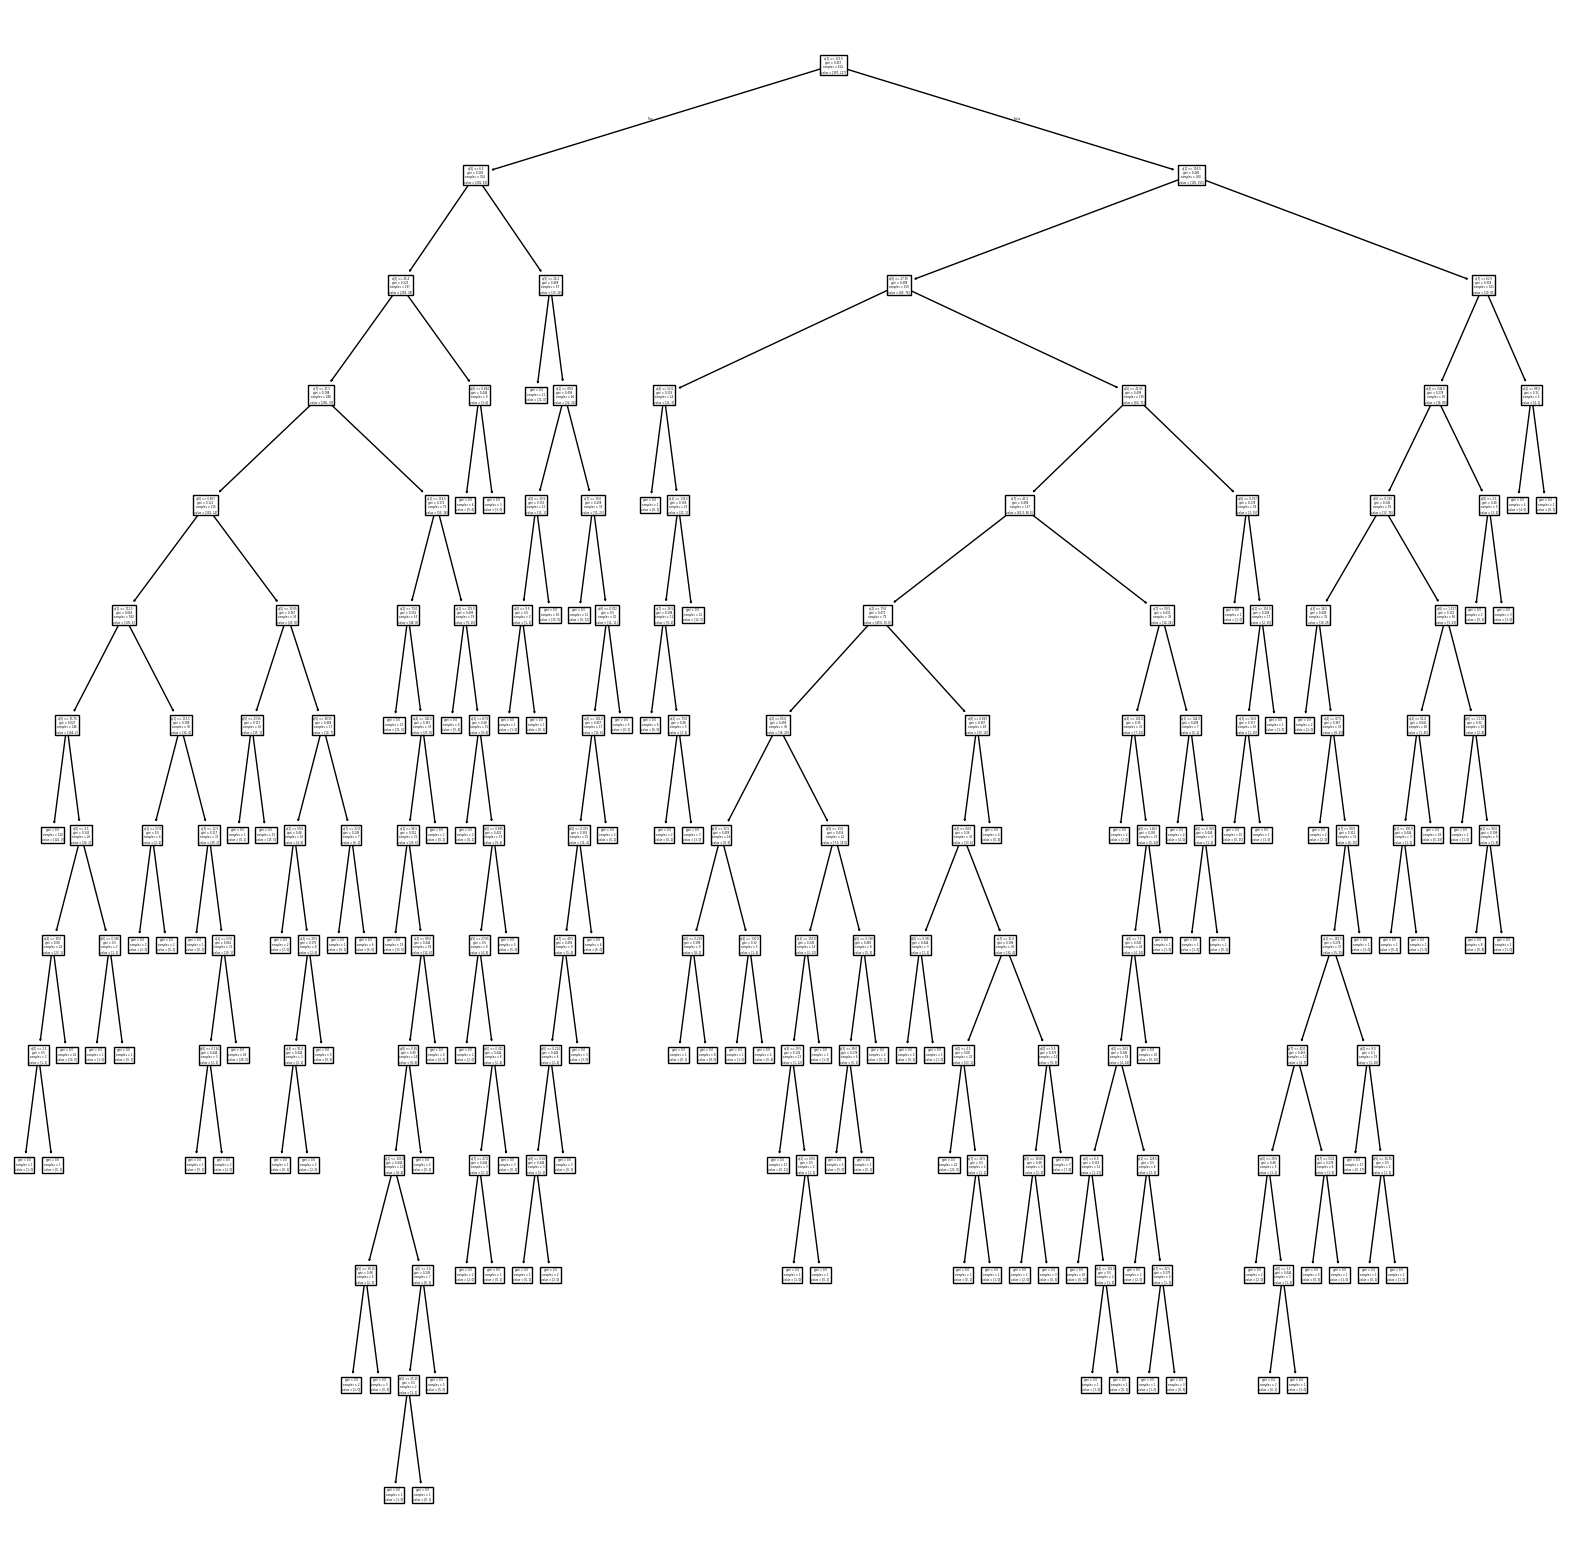

In [115]:
plt.figure(figsize=(20,20))
tree.plot_tree(model)
plt.show()

# Predict the x_test

In [116]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

# Display Training Accuracy

In [117]:
accuracy_score(y_train,model.predict(x_train))


1.0

# Display Test Accuracy

In [118]:
accuracy=model.score(x_test,y_test)
accuracy

0.7337662337662337

# Confusion Matrix

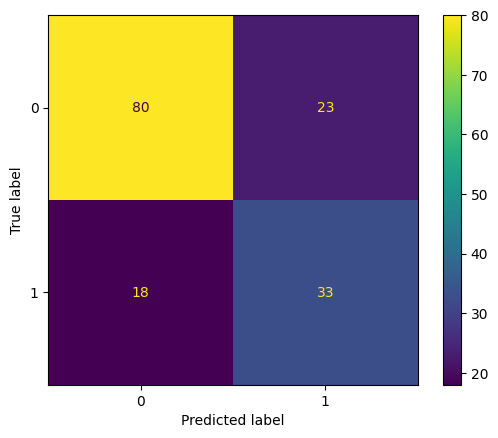

In [138]:

metrics.ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [120]:
Precision = metrics.precision_score(y_test, y_pred)

In [121]:
Precision

0.5892857142857143

# Save Model State

In [96]:
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

# Load Model from Disk

In [97]:
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

In [132]:
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)
input_data_df = pd.DataFrame([input_data], columns=data.columns[:-1])
prediction = lr.predict(input_data_df)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [137]:

prediction=lr.predict(x_train[:1])
print(prediction)
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[0]
The person is not diabetic
